# BL40A2010 Introduction to IoT-Based Systems

## Assignment 2, 16.9.2023

### Author: Hamed Ahmadinia

**(1) Give one example of each of the following type of data.**

Answer:

(a) Analog: Vinyl record with sound wave grooves
	
(b) Digital: MP3 music file in binary format

(c) Primary: Raw data from a consumer preference survey

(d) Secondary (i.e., lack of data that is informative): Summary report on market trends in a  magazine

(e) Metadata: Date, device, and settings of a photograph

(f) Environmental:Temperature and humidity from a weather station

**(2) Write one example when the same structured data can be classified as (a) information, (b) redundancy and (c) not interpretable.**

### I made a sample dataset to show the examples in ation

In [29]:
csv_path = "Student_grades 2023 IB 1 & IB 2.csv"

data_entries = []

# Read the data
with open(csv_path, 'r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        data_entries.append(row)

In [30]:
print(data_entries[0].keys())

dict_keys(['Student_Id', 'Course_Code', 'Grade', 'Remarks'])


In [31]:
# Check for information, redundancy, and not interpretable
information = data_entries[0]
redundancy = None
not_interpretable = None

# Check for redundancy and not interpretable
seen_entries = {}
for entry in data_entries:
    key = (entry['Student_Id'], entry['Course_Code'], entry['Grade'])
    if key in seen_entries:
        redundancy = entry
    else:
        seen_entries[key] = entry

    if entry['Grade'] == '?' or entry['Remarks'] == 'N/A':
        not_interpretable = entry

print(f"(a) Information: Student {information['Student_Id']} in course {information['Course_Code']} received a grade {information['Grade']} with remark: {information['Remarks']}.")  # Change here
if redundancy:
    print(f"(b) Redundancy: Student {redundancy['Student_Id']} in course {redundancy['Course_Code']} has a redundant entry with the same grade and remark.")  # Change here
if not_interpretable:
    print(f"(c) Not Interpretable: Student {not_interpretable['Student_Id']} in course {not_interpretable['Course_Code']} has a grade {not_interpretable['Grade']} with remark: {not_interpretable['Remarks']} which is not clear.")  # Change here

(a) Information: Student 1920231 in course IB_1 received a grade A with remark: Excellent.
(b) Redundancy: Student 19202313 in course IB_2 has a redundant entry with the same grade and remark.
(c) Not Interpretable: Student 19202312 in course IB_2 has a grade ? with remark: N/A which is not clear.


**(3) Photo-voltaic generation converts the sun's radiation into usable electricity. In this task, you will get the *direct solar radiation* with 1 minute time interval from the *Radiation observations*  at [FMI](http://en.ilmatieteenlaitos.fi/download-observations#!/). Plot radiation profile of three different days so that one must be in March, other in July and the last in December (regardless of the year). What measuring station was used? Compare the solar radiation in those 3 days and provide *information* about the potential of solar generation in those days. You can also select the measuring station (but write it in the answer).**

*Hint:* Code like in the tutorial notebook.

In [32]:
#Import libraries
import pandas as pd #https://pandas.pydata.org/
import matplotlib.pyplot as plt #https://matplotlib.org/
import matplotlib.dates as mdates #https://matplotlib.org/

### Uploading datasets from wind speed in Turku - Lentoasema

In [33]:
speed_20230715 = pd.read_csv("wind-Turku-lentoasema-1572023.csv",dayfirst=True,sep=",",
                           header=0,decimal=b".",index_col=0, 
                           parse_dates= [[0, 1, 2, 3]],usecols=[0,1,2,3,5])
                          
speed_20230715.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 145 entries, 2023-07-15 00:00:00 to 2023-07-16 00:00:00
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Wind speed (m/s)  145 non-null    float64
dtypes: float64(1)
memory usage: 2.3 KB


In [34]:
speed_20230815 = pd.read_csv("wind-Turku-lentoasema-1582023.csv",dayfirst=True,sep=",",
                           header=0,decimal=b".",index_col=0, 
                           parse_dates= [[0, 1, 2, 3]],usecols=[0,1,2,3,5])
                          
speed_20230815.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 145 entries, 2023-08-15 00:00:00 to 2023-08-16 00:00:00
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Wind speed (m/s)  145 non-null    float64
dtypes: float64(1)
memory usage: 2.3 KB


In [35]:
speed_20230915 = pd.read_csv("wind-Turku-lentoasema-1592023.csv",dayfirst=True,sep=",",
                           header=0,decimal=b".",index_col=0, 
                           parse_dates= [[0, 1, 2, 3]],usecols=[0,1,2,3,5])
                          
speed_20230915.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 145 entries, 2023-09-15 00:00:00 to 2023-09-16 00:00:00
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Wind speed (m/s)  145 non-null    float64
dtypes: float64(1)
memory usage: 2.3 KB


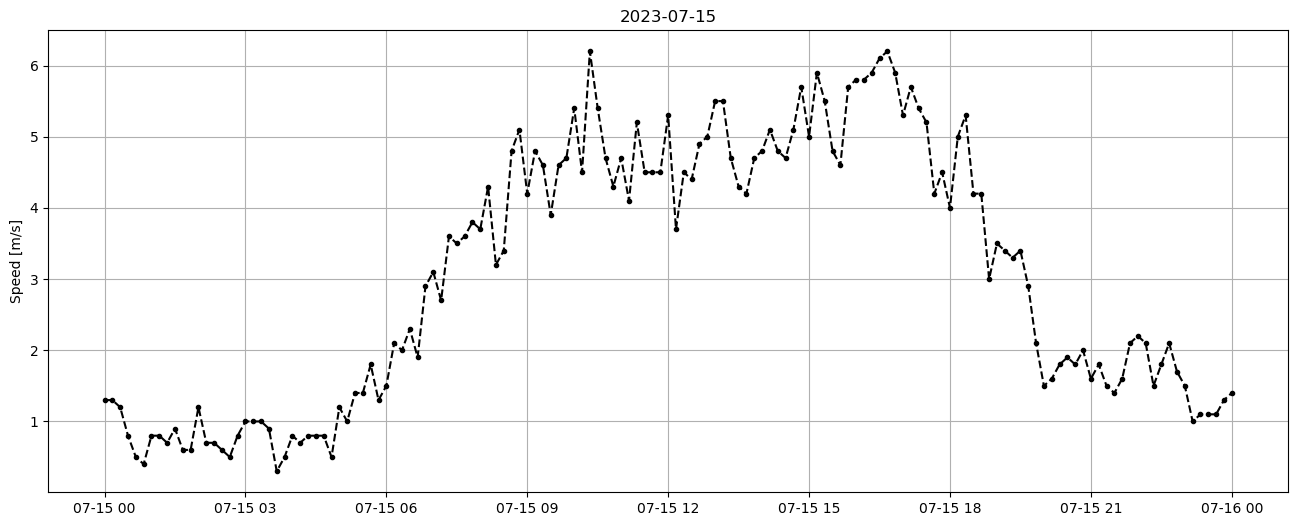

In [36]:
#Day1
day1 = '2023-07-15'
plt.figure(figsize=(16,6)) 
plt.plot(speed_20230715,color='black', marker='.',linestyle='--') 
plt.title(day1) 
plt.ylabel("Speed [m/s]") 
plt.grid(True) 
plt.show() 

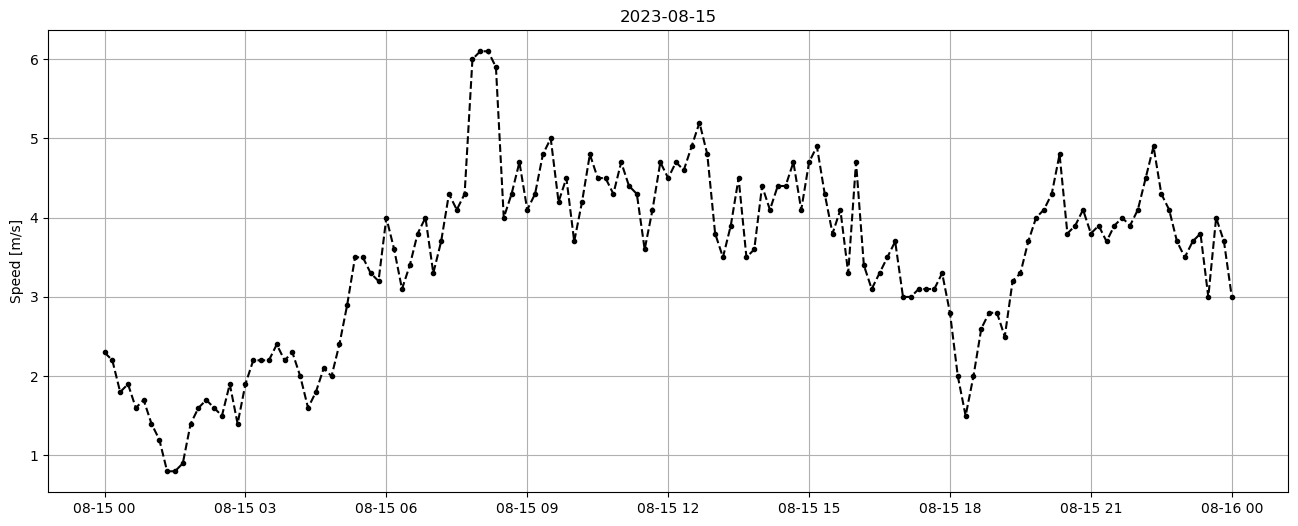

In [38]:
#Day2
day2 = '2023-08-15'
plt.figure(figsize=(16,6)) 
plt.plot(speed_20230815,color='black', marker='.',linestyle='--') 
plt.title(day2) 
plt.ylabel("Speed [m/s]") 
plt.grid(True) 
plt.show() 

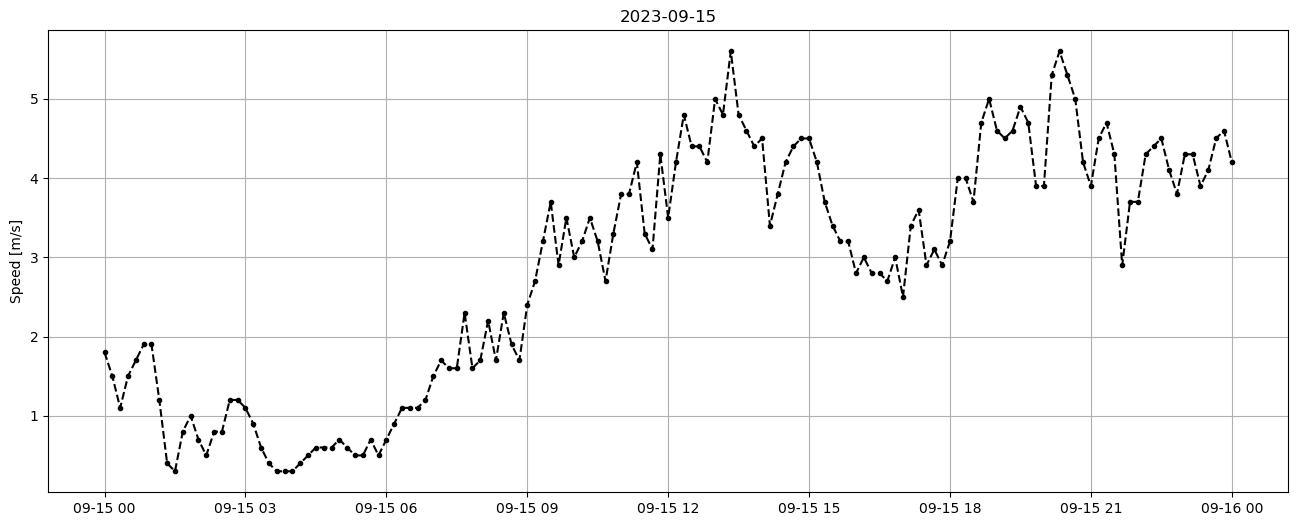

In [39]:
#Day3
day3 = '2023-09-15'
plt.figure(figsize=(16,6)) 
plt.plot(speed_20230915,color='black', marker='.',linestyle='--') 
plt.title(day3) 
plt.ylabel("Speed [m/s]") 
plt.grid(True) 
plt.show() 

## Three together with improved visualization

In [40]:
#Difference
delta1 = speed_20230915.index[0].date() - speed_20230815.index[0].date()
#
delta2 = speed_20230915.index[0].date() - speed_20230715.index[0].date()

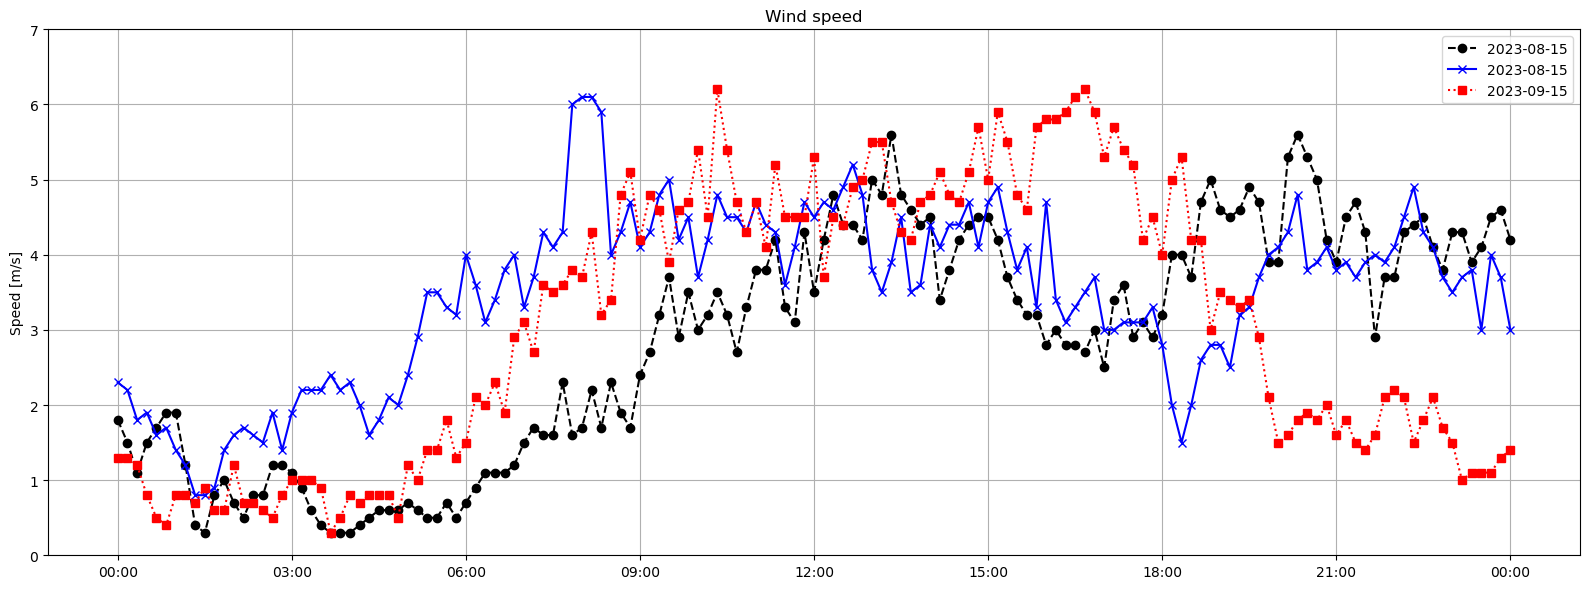

In [41]:
fig, ax = plt.subplots(1,figsize=(16,6))
#
plt.plot(speed_20230915.index, speed_20230915.values, label=day1, color='black', 
         marker='o',linestyle='--')
#
plt.plot(speed_20230815.index + pd.offsets.Day(delta1.days), 
         speed_20230815.values, label=day2, color='blue', marker='x',linestyle='-')
#
plt.plot(speed_20230715.index + pd.offsets.Day(delta2.days), 
         speed_20230715.values, label=day3, color='red', marker='s',linestyle=':')
#
plt.legend()
plt.ylim([0, 7])
plt.title("Wind speed") 
plt.ylabel("Speed [m/s]") 
plt.grid(True)
plt.tight_layout()
#change x ticks
xfmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(xfmt)
#
plt.show() 

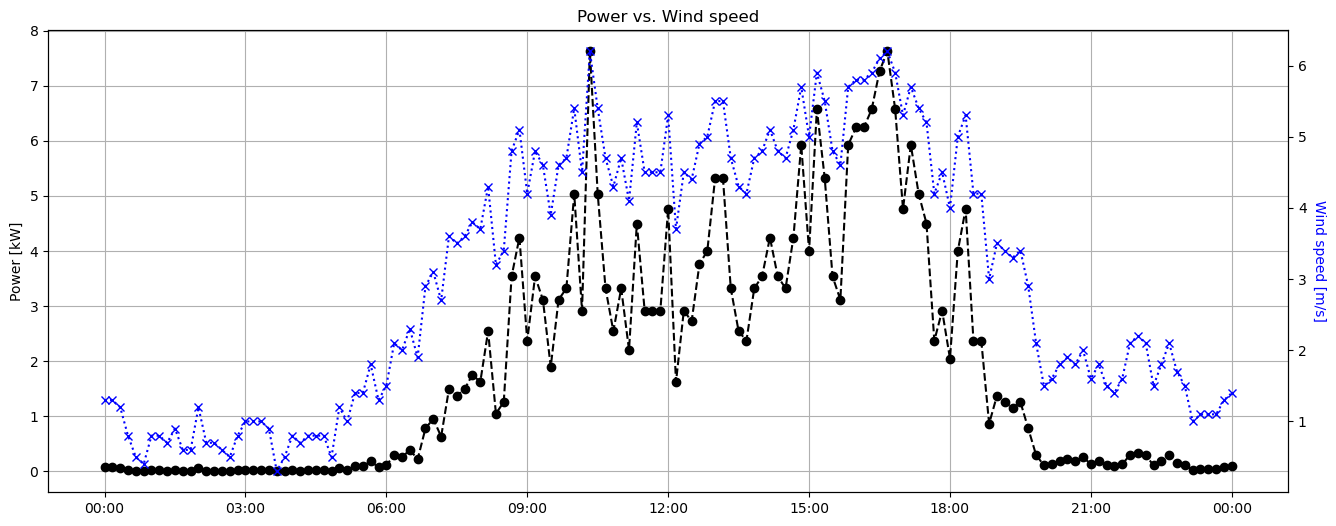

In [42]:
#subplot function
#https://matplotlib.org/2.0.1/examples/api/two_scales.html
####
fig, ax1 = plt.subplots(figsize=(16,6))
#left axis
ax1.set_ylabel("Power [kW]", color='black')
ax1.plot( 0.032*(speed_20230715)**3,color='black', marker='o',linestyle='--') 
#right axis
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel("Wind speed [m/s]", color='blue',rotation=270,va="bottom")  
ax2.plot(speed_20230715,color='blue', marker='x',linestyle=':')
#
ax1.grid(True)
plt.title("Power vs. Wind speed") #title     
xfmt = mdates.DateFormatter('%H:%M')
ax1.xaxis.set_major_formatter(xfmt)
#
plt.show()

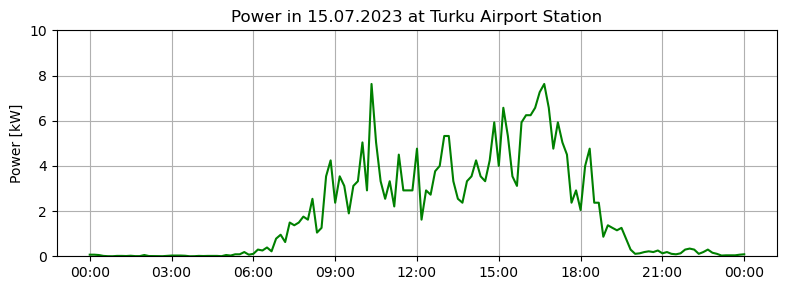

In [44]:
fig, ax = plt.subplots(1,figsize=(8,3))
#
plt.plot(0.032*(speed_20230715)**3,  color='green', marker='',linestyle='-')
#
plt.ylim([0, 10])
plt.title("Power in 15.07.2023 at Turku Airport Station") 
plt.ylabel("Power [kW]") 
plt.grid(True)
plt.tight_layout()
xfmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(xfmt)
#
plt.show() 

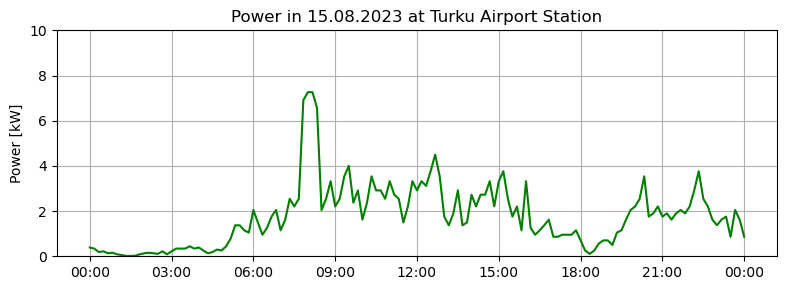

In [45]:
fig, ax = plt.subplots(1,figsize=(8,3))
#
plt.plot(0.032*(speed_20230815)**3,  color='green', marker='',linestyle='-')
#
plt.ylim([0, 10])
plt.title("Power in 15.08.2023 at Turku Airport Station") 
plt.ylabel("Power [kW]") 
plt.grid(True)
plt.tight_layout()
xfmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(xfmt)
#
plt.show() 

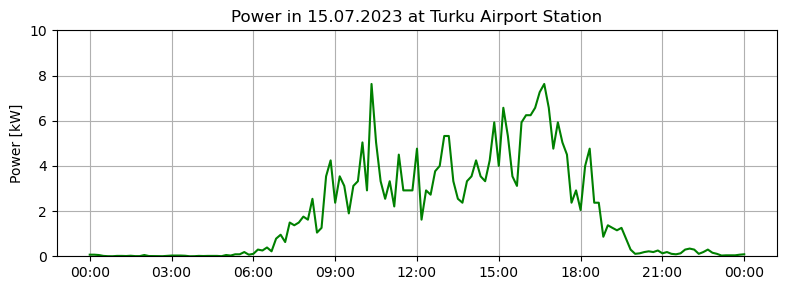

In [46]:
fig, ax = plt.subplots(1,figsize=(8,3))
#
plt.plot(0.032*(speed_20230715)**3,  color='green', marker='',linestyle='-')
#
plt.ylim([0, 10])
plt.title("Power in 15.07.2023 at Turku Airport Station") 
plt.ylabel("Power [kW]") 
plt.grid(True)
plt.tight_layout()
xfmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(xfmt)
#
plt.show() 

**(4) Read the text [What Does the Metaverse Mean for the Future of Energy Consumption?](https://earth.org/metaverse-energy-consumption/). Write a brief analysis of the text based on the relation between data, energy and level of processes. From the energy perspective, is it possible to maintain this kind of technologies? Note: This is clearly not a right/wrong question, but a space to critically think about current issues related to the course.**

Answer: The immersive online experience that Meta introduced with the Metaverse has many potential benefits, including reduced emissions from transportation and reshaping our global carbon footprint. Given that Meta has just recently achieved 100% renewable energy consumption, this could significantly reduce the global carbon footprint. However, extensive use of sophisticated AI and VR suggests an increase in data processing, which in turn necessitates substantial energy. Intel's analysis and a study from the University of Massachusetts both highlight the environmental difficulties and massive infrastructure enhancements needed. Such expansion, with its potential for billions of users, could also increase the network's security risks.

Big Tech is still leaning towards environmentally friendly solutions despite these challenges. In the near future, companies like Meta, Microsoft, and Apple plan to use 100% renewable energy and produce zero net emissions. The transition to AR as a more sustainable alternative to VR could serve as a bridge to reduce energy consumption because of the seamless integration of digital components into our real world in AR. Despite the fact that advances in environmentally friendly technology offer cause for optimism, the question of whether or not the Metaverse can become globally sustainable still stands.